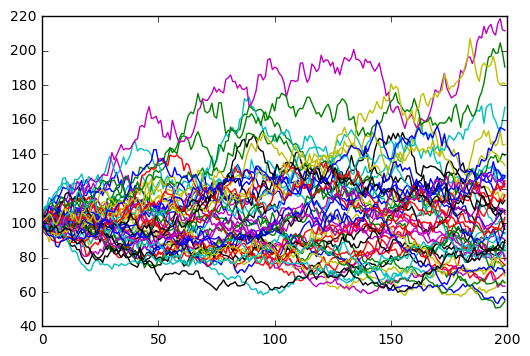

In [12]:
import numpy as np
import matplotlib.pyplot as plt

#株価の確率微分方程式に従うサンプルパスを生成
#dS/S = r * dt + vol * dW_t
def generate_path(S0, T, r, vol, N, M):
    dt = T/M
    w = np.cumsum(np.reshape(np.random.standard_normal(N*M), (N,M)), 1) * (dt**0.5)
    t = np.cumsum(np.ones((N,M)), 1)*dt   
    return S0 * np.exp((r-0.5*vol**2)*t + vol*w)

if __name__ == "__main__":
    #株価・満期・瞬間金利・ボラティリティ
    S0  = 100.0
    T   = 3.0
    R   = 0.01
    VOL = 0.2
    #パス数・時間刻み数
    N = 50
    M = 200
    #パスの生成＆描画
    x = generate_path(S0, T, R, VOL, N, M)
    plt.plot(x.T)
    plt.show()

モンテカルロで条件付き期待値の計算

　$$V(S_{t},t) = E[\mathrm{e}^{-r(T-t)}(S_{T}-K)^{+}| \mathcal{F}_{t}]
 $$
 where
 $$dS_{t}= rS_{t}dt + \sigma S_{t}dW_{t}
 $$

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
def generate_path(s0,T,r,vol,N,M):
    dt = T/M
    w = np.cumsum(np.reshape(np.random.standard_normal(N*M),(N,M),1)*(dt**0.5))
    t = np.cumsum(np.ones(N,M),1)*dt
    return s0*np.exp((r-0.5*vol**2)*T)/(vol*w)
def call_price_bs(s0,k,T,r,vol):
    d1 = (np.log(s0/k)+(r+0,5*(vol**2.0))*T)/(vol*np.sqrt(T))
    d2 = d1-vol*np.sqrt(T)
    return(s0*norm.cdf(d1)-k*np.exp(-r*T)*norm.cdf(d2))
def call_price_monte(s0,k,T,r,vol,N,M):
    s = generate_path(s0,T,r,vol,N,M)
    discount = np.exp(-r*T)
    callprice = np(lambda x:discount*max(x,0),s[:,-1]-k)
    return(np.average(callprice),np.std(callprice)/(N**0.5))
def call_price_monte_conditional(s0,k,T,r,vol,N,M):
    s_t = generate_path(s0,t,r,vol,N,M)[:,-1]
    discount = np.exp(-r*t)
    callprice = [discount*call_price_bs(s,k,T-t,r,vol)for s in s_t]
    return(np,average(callprice),np.std(callprice)/(N**0.5))

if __name__=="__main__.":
    S0 = 100.0
    K = 100.0
    T = 3.0
    R = 0.01
    VOL = 0.2
    N = 10000
    M = 200
    
print("Exact solution")
print (call_price_bs(S0,K,T,R,VOL))
print("Simple montecarlo")
price_monte = call_price_monte(S0,K,T,R,VOL,N,M)
print("montecarlo with tower property") 
ts = np.linspace(0,T,10,endpoint=True)
price_monte_conditional=[call_price_monte_conditional(S0,Kt,T,RVOL,N,M)for t in ts]
plt.plot(ts,map(lambda x:x[1],price_monte_conditional),ts,[price_monte[1] for i in ts])
plt.show()

Exact solution


NameError: name 'S0' is not defined

numpy.randomによる一様乱数の生成

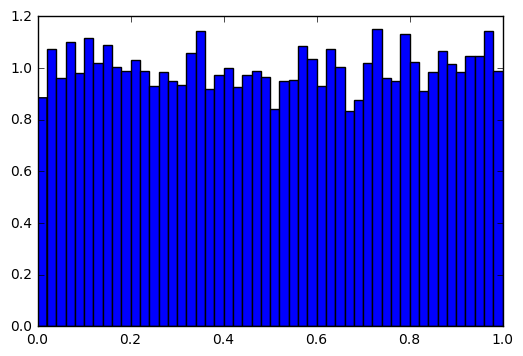

In [9]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed()
N =10000
x = np.random.uniform(0.0,1.0,N)
nbins = 50
plt.hist(x,nbins,normed=True)
plt.show()

scipy.statsによる一様乱数の生成

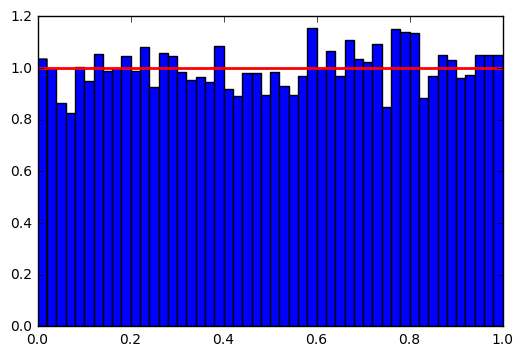

In [14]:
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt

np.random.seed()
N =10000
rv = uniform(loc=0.0,scale=1.0)
x = rv.rvs(size=N)
nbins = 50
plt.hist(x,nbins,normed=True)

x = np.linspace(rv.ppf(0),rv.ppf(1),100)
plt.plot(x,uniform.pdf(x),'r-',lw=2,label='uniform pdf')

plt.show()